In [1]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
df = pd.read_csv("C:/Users/nikita/Downloads/techtronix_customer_data.csv")


In [5]:
print(df.head())

   CustomerID  Gender  Age       Location   ProductCategory  PurchaseAmount  \
0           1   Other   54  Port Tonyland   Security Camera          420.87   
1           2  Female   33    East Jeremy   Security Camera          419.51   
2           3    Male   55      Rachelton        Smart Plug          406.99   
3           4    Male   44     Davidburgh  Smart Thermostat          394.43   
4           5   Other   42      Greenstad       Smart Light          283.81   

  LastPurchaseDate  IsChurned  SupportTickets  MarketingEngagement  
0       2024-06-18          1               3                   40  
1       2024-11-19          0               5                   43  
2       2023-04-22          0               3                   72  
3       2024-07-11          1               1                   80  
4       2024-10-24          0               5                   61  


In [6]:
le_gender = LabelEncoder()
le_product = LabelEncoder()
le_location = LabelEncoder()

In [7]:
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['ProductCategory'] = le_product.fit_transform(df['ProductCategory'])
df['Location'] = le_location.fit_transform(df['Location'])


In [8]:
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'])

In [9]:
df['Recency'] = (pd.to_datetime('today') - df['LastPurchaseDate']).dt.days

In [10]:
df.drop('LastPurchaseDate', axis=1, inplace=True)


In [11]:
X = df.drop(['CustomerID', 'IsChurned'], axis=1)

In [12]:
y = df['IsChurned']

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5066666666666667

Confusion Matrix:
 [[16 49]
 [25 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.25      0.30        65
           1       0.55      0.71      0.62        85

    accuracy                           0.51       150
   macro avg       0.47      0.48      0.46       150
weighted avg       0.48      0.51      0.48       150



In [19]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

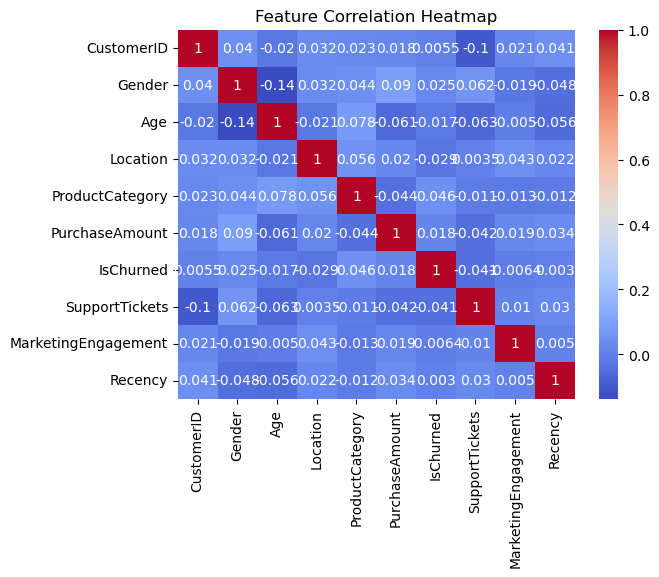

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [22]:
segmentation_df = df[['PurchaseAmount', 'MarketingEngagement', 'SupportTickets', 'Recency']]


In [23]:
scaler = StandardScaler()
seg_scaled = scaler.fit_transform(segmentation_df)

In [24]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(seg_scaled)
    inertia.append(km.inertia_)

C:\Users\nikita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nikita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nikita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nikita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

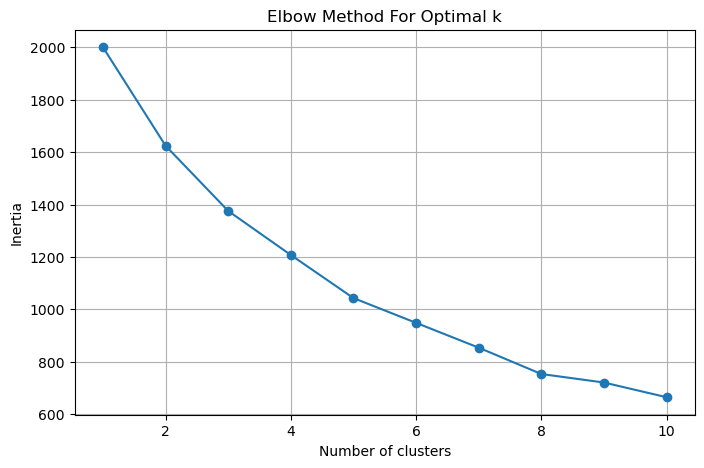

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(seg_scaled)


C:\Users\nikita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [27]:
print(pd.DataFrame(kmeans.cluster_centers_, columns=segmentation_df.columns))

   PurchaseAmount  MarketingEngagement  SupportTickets   Recency
0        0.569266             1.065759       -0.219742  0.624590
1       -0.935975            -0.341534        0.294743  0.538576
2        0.778887            -0.994583       -0.300996  0.062997
3       -0.123925             0.379821        0.120187 -1.140554


In [28]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(seg_scaled)

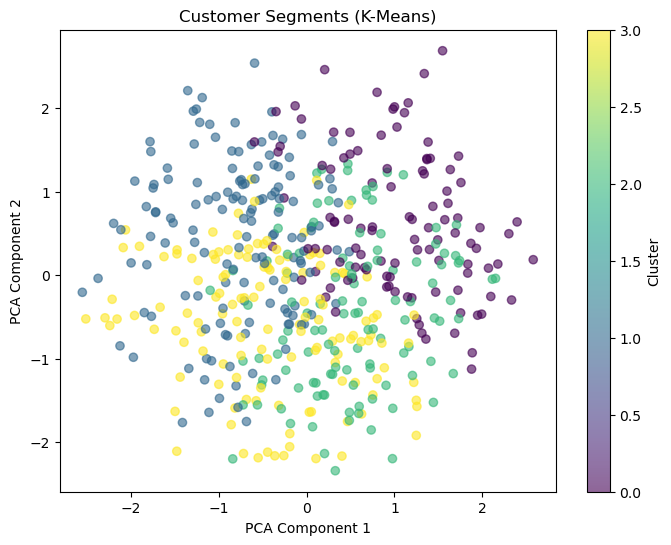

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [31]:
df = pd.read_csv("C:/Users/nikita/Downloads/techtronix_customer_segments.csv")

In [32]:
df['PurchaseStatus'] = df['SalesStage'].apply(lambda x: 1 if x == 'Won' else 0)

In [33]:
categoricals = ['LeadSource', 'Cluster']
df[categoricals] = df[categoricals].apply(LabelEncoder().fit_transform)

In [34]:
X = df[['LeadSource', 'Cluster', 'DaysInStage']]
y = df['PurchaseStatus']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
df['PurchaseLikelihood'] = model.predict_proba(X)[:,1]

In [38]:
df.to_csv("techtronix_scored.csv", index=False)


In [39]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
from prophet import Prophet

In [43]:
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'])
monthly = df.groupby(pd.Grouper(key='LastPurchaseDate', freq='M')).PurchaseAmount.sum().reset_index()
monthly.columns = ['ds', 'y']

C:\Users\nikita\AppData\Local\Temp\ipykernel_22780\3688683635.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='LastPurchaseDate', freq='M')).PurchaseAmount.sum().reset_index()


In [44]:
model = Prophet()
model.fit(monthly)

13:21:28 - cmdstanpy - INFO - Chain [1] start processing
13:21:32 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

C:\Users\nikita\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


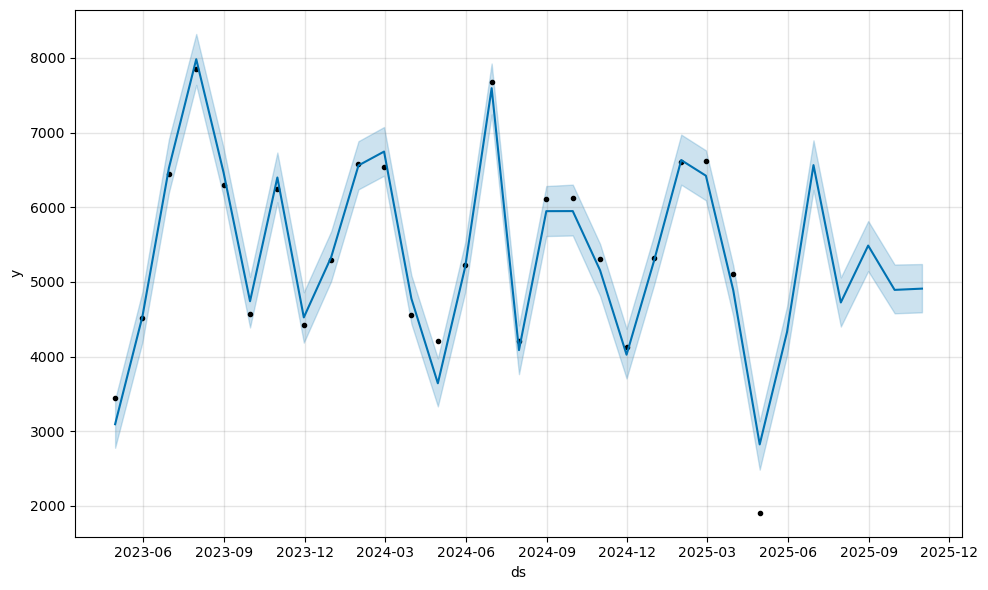

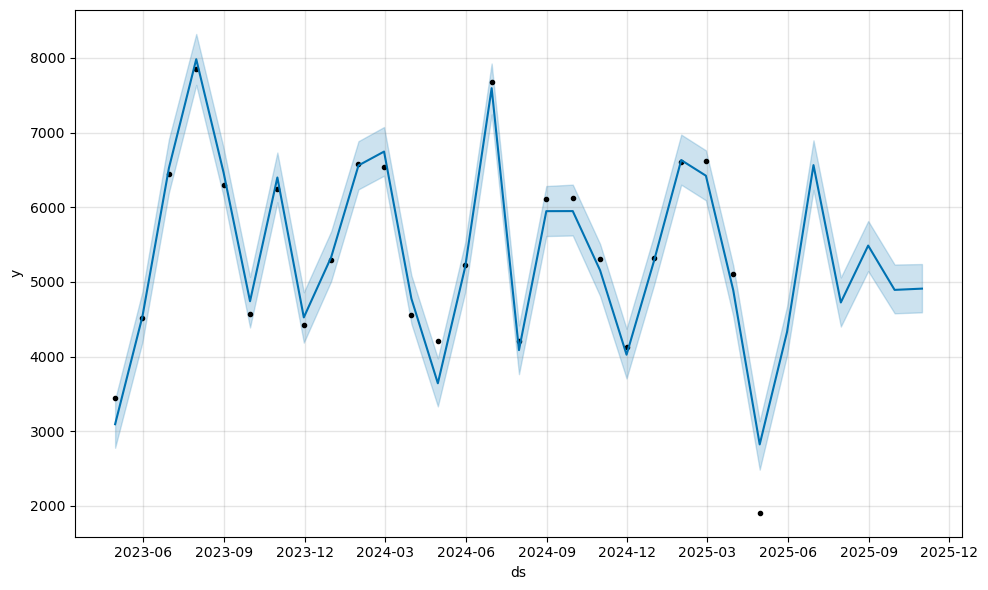

In [46]:
model.plot(forecast)